<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Mission 1 </h1>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Imporation des librairies</h3>
</div>

In [307]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Imporation des données</h3>
</div>

In [308]:
customers = pd.read_csv("../data/olist_customers_dataset.csv")
geolocation = pd.read_csv("../data/olist_geolocation_dataset.csv")
items = pd.read_csv("../data/olist_order_items_dataset.csv")
payments = pd.read_csv("../data/olist_order_payments_dataset.csv")
reviews = pd.read_csv("../data/olist_order_reviews_dataset.csv")
orders = pd.read_csv("../data/olist_orders_dataset.csv")
products = pd.read_csv("../data/olist_products_dataset.csv")
sellers = pd.read_csv("../data/olist_sellers_dataset.csv")
translate = pd.read_csv("../data/product_category_name_translation.csv")

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; "> Traduction des produits </h3>
</div>

In [309]:
translate.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [310]:
translate_mapper = dict(zip(translate.product_category_name, translate.product_category_name_english))

In [311]:
products['product_category_name'] = products.product_category_name.map(translate_mapper)

In [312]:
products.product_category_name.head()

0         perfumery
1               art
2    sports_leisure
3              baby
4        housewares
Name: product_category_name, dtype: object

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Création de la Dataframe initiale</h3>
</div>

In [313]:
df = pd.merge(customers, orders, on = "customer_id", how = "inner")
df = pd.merge(pd.merge(df, items, on = "order_id", how='inner'), products, on = "product_id", how="inner")
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,124.99,15.62,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,106.99,30.59,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Recency</h3>
</div>

**Nous allons créer une colonne qui va nous permettre de savoir combien de jour s'est écouler entre la dernière commande d'un client par rapport à la dernière commande du dernier client.**

In [314]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S')

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112650 non-null  object        
 1   customer_unique_id             112650 non-null  object        
 2   customer_zip_code_prefix       112650 non-null  int64         
 3   customer_city                  112650 non-null  object        
 4   customer_state                 112650 non-null  object        
 5   order_id                       112650 non-null  object        
 6   order_status                   112650 non-null  object        
 7   order_purchase_timestamp       112650 non-null  datetime64[ns]
 8   order_approved_at              112635 non-null  datetime64[ns]
 9   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 10  order_delivered_customer_date  110196 non-null  datetime64[ns]
 11  

In [316]:
df.describe(include="all")

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24508\1985922364.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24508\1985922364.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_24508\1985922364.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\utilisateur\AppData\Local

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650,112650,112650.000000,112650,112650,112650,112650,112650,112635,111456,...,112650.000000,112650.000000,111023,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
unique,98666,95420,NaN,4110,27,98666,7,98112,90174,81017,...,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,fc3d1daec319d62d49bfb5e1f83123e9,c8460e4251689ba205045f3ea17884a1,NaN,sao paulo,SP,8272b63d03f5f79c56e9e4120aec44ef,delivered,2017-07-16 18:19:25,2018-02-24 03:20:27,2018-05-09 15:48:00,...,NaN,NaN,bed_bath_table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,24,NaN,17808,47449,21,110197,21,23,48,...,NaN,NaN,11115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,35119.309090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.653739,19.990320,NaN,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,NaN,NaN,29866.120801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,183.633928,15.806405,NaN,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.900000,13.080000,NaN,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000


In [317]:
df_max_purchase = df.groupby('customer_unique_id').order_purchase_timestamp.max().reset_index()
df_max_purchase.columns = ['customer_unique_id', 'MaxPurchaseDate']

df_max_purchase.head()

,customer_unique_id,MaxPurchaseDate
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [318]:
df_max_purchase['Recency'] = (df_max_purchase['MaxPurchaseDate'].max() - df_max_purchase['MaxPurchaseDate']).dt.days

In [319]:
df_max_purchase

,customer_unique_id,MaxPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,325
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,292
...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,451
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,266
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,572
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,123


In [320]:
df_max_purchase['Recency'].describe()

count    95420.000000
mean       242.600377
std        153.160320
min          0.000000
25%        118.000000
50%        223.000000
75%        352.000000
max        728.000000
Name: Recency, dtype: float64

Sur nos 95420 clients différents : 

    -En moyenne leurs dernières commandes était il y a 243 jour
    -Au plus tard il y a 728 jours
    -Et la médianne se trouve à 223 jours

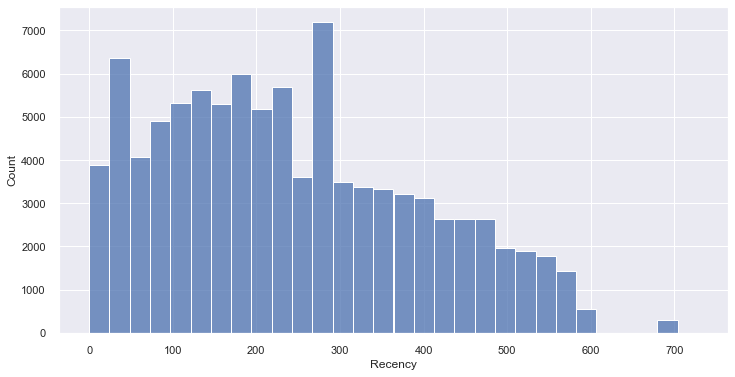

In [321]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df_max_purchase['Recency'], bins=30)
plt.show()

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Frequence </h3>
</div>

**Nous calculons la fréquence de commande d'un client.**

In [322]:
df_frequency = df.groupby('customer_unique_id').order_purchase_timestamp.count().reset_index()
df_frequency.columns = ['customer_unique_id','order_purchase_timestamp']

df_frequency.describe()

,order_purchase_timestamp
count,95420.00000
mean,1.18057
std,0.62145
min,1.00000
25%,1.00000
50%,1.00000
75%,1.00000
max,24.00000


**il y a au total 95420 clients.</br>
la moyennes est de 1.18.</br>
écart-type est de 0.6214.</br>
la mediane nous montre que les clients ne commande qu'une seule fois.</br>
75 pourcent des clients ne commande que 1 seule fois.</br>
et au maximum il y a 24 commandes du meme client.</br>**

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Nombre de produit et type de produit</h3>
</div>

**Nous allons maintenant voir le nombre de produit et le type de produit que commande un client.**

In [323]:
df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,124.99,21.88,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,112.99,24.90,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,124.99,15.62,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,106.99,30.59,office_furniture,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,f6c6d3e1e20969a5eed982163f959719,fb354969e06f2093c0083cbfbb91864e,1521,sao paulo,SP,b2f58affcc178fea2daaf834f1acff5e,delivered,2018-07-14 14:08:11,2018-07-17 04:31:33,2018-07-25 11:18:00,...,99.90,21.14,home_confort,32.0,373.0,1.0,1500.0,45.0,30.0,45.0
112646,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-28 14:18:59,...,19.99,10.96,pet_shop,43.0,779.0,1.0,300.0,16.0,16.0,16.0
112647,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,PA,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:46,2017-12-09 23:50:32,2017-12-11 20:29:02,...,250.00,54.11,health_beauty,40.0,1694.0,1.0,2400.0,33.0,10.0,16.0
112648,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:52,2018-04-04 18:08:41,2018-04-05 16:36:49,...,84.90,7.46,fashion_bags_accessories,29.0,498.0,4.0,300.0,16.0,16.0,11.0


<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Panier Moyen </h3>
</div>

**Panier moyen par client**

In [324]:
df.order_id.value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
582ecddc80251f58adb996143e81d6e0     1
db5a3eab52ef5c18c745c172a5050809     1
96c3a40e38272781dd5b3dfc4797e8f7     1
9761d4d539165b2fedae19fe7d0f8cc8     1
51c6d2f460589fa7b65f2da51e860206     1
Name: order_id, Length: 98666, dtype: int64

In [325]:
df.order_id.value_counts().mean()

1.1417306873695092

In [326]:
df.order_id.value_counts().describe()

count    98666.000000
mean         1.141731
std          0.538452
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: order_id, dtype: float64

In [327]:
df_panier = df.groupby("customer_unique_id")['price'].sum().reset_index()

df_panier

,customer_unique_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
95416,fffea47cd6d3cc0a88bd621562a9d061,64.89
95417,ffff371b4d645b6ecea244b27531430a,89.90
95418,ffff5962728ec6157033ef9805bacc48,115.00


In [328]:
df_panier.describe()

,price
count,95420.000000
mean,142.440198
std,217.656355
min,0.850000
25%,47.900000
50%,89.900000
75%,155.000000
max,13440.000000


**il y a au total 98666 clients.</br>
la moyennes est de 125.91 Dollars </br>
écart-type est de 190.98.</br>
la mediane nous montre que les clients depense 79 Dollars.</br>
75 pourcent des clients depense 139 Dollars.</br>
et au maximum il un client a dépensé 6735 Dollars.</br>**

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Canal d'achat </h3>
</div>

In [329]:
df["nombre_vente"] = 0
df_category = df.groupby("product_category_name")['nombre_vente'].count().reset_index()

In [330]:
df_category

,product_category_name,nombre_vente
0,agro_industry_and_commerce,212
1,air_conditioning,297
2,art,209
3,arts_and_craftmanship,24
4,audio,364
...,...,...
66,stationery,2517
67,tablets_printing_image,83
68,telephony,4545
69,toys,4117


In [331]:
df_provisoire = df[["product_photos_qty","product_category_name"]]

In [332]:
df_category = pd.merge(df_category, df_provisoire, on="product_category_name", how="inner")

In [333]:
df_category.drop_duplicates(inplace=True)
df_category

,product_category_name,nombre_vente,product_photos_qty
0,agro_industry_and_commerce,212,2.0
22,agro_industry_and_commerce,212,1.0
23,agro_industry_and_commerce,212,3.0
33,agro_industry_and_commerce,212,6.0
36,agro_industry_and_commerce,212,8.0
...,...,...,...
106843,watches_gifts,5991,6.0
107303,watches_gifts,5991,7.0
108397,watches_gifts,5991,8.0
108682,watches_gifts,5991,9.0


In [334]:
df_category = df_category.groupby("product_category_name").median()

In [335]:
df_category.sort_values("nombre_vente")

,nombre_vente,product_photos_qty
product_category_name,,
security_and_services,2.0,2.5
fashion_childrens_clothes,8.0,3.5
la_cuisine,14.0,1.5
cds_dvds_musicals,14.0,2.0
arts_and_craftmanship,24.0,3.5
...,...,...
computers_accessories,7827.0,5.0
furniture_decor,8334.0,6.5
sports_leisure,8641.0,6.0


<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Nombre de produit</h3>
</div>

**Nous allons voir le nombre de produit et le type de produit que commande un client**

In [336]:
df["number_product"] = 0
df_product = df.groupby(["customer_unique_id"]).number_product.count().reset_index()

In [337]:
df_product.sort_values("number_product", ascending=False).head()

,customer_unique_id,number_product
74752,c8460e4251689ba205045f3ea17884a1,24
25885,4546caea018ad8c692964e3382debd19,21
73155,c402f431464c72e27330a67f7b94d4fb,20
39443,698e1cf81d01a3d389d96145f7fa6df8,20
5741,0f5ac8d5c31de21d2f25e24be15bbffb,18


<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Mission 2 </h1>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Imporation des librairies</h3>
</div>

In [338]:
%env OMP_NUM_THREADS=1
import numpy as np
from sklearn.datasets import load_iris
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

env: OMP_NUM_THREADS=1


<div style="display: flex; background-color: RGB(100,149,237);" >
<h2 style="margin: auto; padding: 30px; ">Recency</h2>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">K-means</h3>
</div>

Text(0, 0.5, 'Cout du modele (Inertia)')

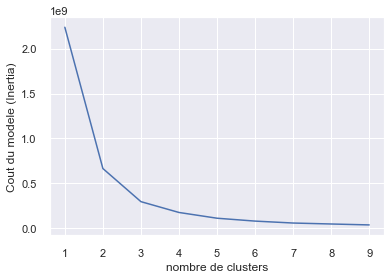

In [339]:
X = df_max_purchase[["Recency"]]
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")

In [340]:
model = KMeans(n_clusters=5)
model.fit(X)
model.predict(X)
X["Groupe"] = model.labels_
X

,Recency,Groupe
0,115,0
1,118,0
2,541,4
3,325,1
4,292,3
...,...,...
95415,451,4
95416,266,3
95417,572,4
95418,123,0


In [341]:
type_client = model.predict(X[["Recency"]])
np.sort(type_client)
x = type_client
unique, counts = np.unique(x, return_counts=True)
x_count = np.asarray((unique, counts)).T
print(
    "Le cluster 0 contient {} clients,\n le cluster 1 contient {} clients,\n et le cluster 2 contient {} clients,\n et le cluster 3 contient {} clients,\n et le cluster 4 contient {} clients".format(
        x_count[0][1], x_count[1][1], x_count[2][1], x_count[3][1], x_count[4][1]
    )
)

Le cluster 0 contient 25014 clients,
 le cluster 1 contient 15703 clients,
 et le cluster 2 contient 19939 clients,
 et le cluster 3 contient 22909 clients,
 et le cluster 4 contient 11855 clients


In [342]:
min = X.groupby("Groupe").min()

max = X.groupby("Groupe").max()

df_recency = min.assign(max = max)
df_recency.rename(columns = {"Recency":"min"}, inplace = True)
df_recency

,min,max
Groupe,,
0,104,210
1,325,450
2,0,103
3,211,324
4,451,728


**Donc on peut voir que l'on a 3 groupes de clients au niveau du Recency.**

In [343]:
matrice = np.asarray((df_recency))
print("Pour le cluster 0 les clients on commander pour la dernière fois entre {} et {} jour.\nPour le cluster 1 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 2 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 3 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 4 les clients on commander pour la dernière fois entre {} et {} jours ".format(
    matrice[0][0], matrice[0][1], matrice[1][0], matrice[1][1], matrice[2][0], matrice[2][1], matrice[1][1], matrice[3][0], matrice[3][1], matrice[1][1], matrice[4][0], matrice[4][1])
     )

Pour le cluster 0 les clients on commander pour la dernière fois entre 104 et 210 jour.
Pour le cluster 1 les clients on commander pour la dernière fois entre 325 et 450 jours.
Pour le cluster 2 les clients on commander pour la dernière fois entre 0 et 103 jours.
Pour le cluster 3 les clients on commander pour la dernière fois entre 450 et 211 jours.
Pour le cluster 4 les clients on commander pour la dernière fois entre 324 et 450 jours 


<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">CAH (classification ascendante hiérarchique)</h3>
</div>

In [344]:
import plotly.figure_factory as ff
from sklearn.cluster import AgglomerativeClustering

#On va faire ca sur un echantillon moitié moins grand car mon pc va exploser sinon

echantillon = df_max_purchase[["Recency"]].iloc[0:100]

fig = ff.create_dendrogram(echantillon)
fig.update_layout(width=800, height=500)
fig.show()

Il est souvent pertinent de choisir le partitionnement correspondant au plus grand saut entre deux clusters consécutifs. C'est pour cela que nous allons donc choisir 5 clusters comme nombre de clusters optimal.

In [345]:
echantillon = df_max_purchase[["Recency"]].iloc[0:500]

fig = ff.create_dendrogram(echantillon)
fig.update_layout(width=800, height=500)
fig.show()

On va devoir selectionner les 20000 premieres iteration afin de se donner un ordre d'idée des groupes car je n'ai pas suffisament de RAM pour lancer sur la totalité.

In [346]:
Recency = df_max_purchase[["Recency"]].iloc[0:20000]
y_pred = AgglomerativeClustering(n_clusters=5).fit_predict(Recency)

In [347]:
Recency["groupe"] = y_pred

In [348]:
min = Recency.groupby("groupe").min()

max = Recency.groupby("groupe").max()

Recency = min.assign(max = max)
Recency.rename(columns = {"Recency":"min"}, inplace = True)
Recency

,min,max
groupe,,
0,217,377
1,378,506
2,4,148
3,149,216
4,507,700


In [349]:
matrice = np.asarray((Recency))
print("Pour le cluster 0 les clients on commander pour la dernière fois entre {} et {} jour.\nPour le cluster 1 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 2 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 3 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 4 les clients on commander pour la dernière fois entre {} et {} jours ".format(
    matrice[0][0], matrice[0][1], matrice[1][0], matrice[1][1], matrice[2][0], matrice[2][1], matrice[1][1], matrice[3][0], matrice[3][1], matrice[1][1], matrice[4][0], matrice[4][1])
     )

Pour le cluster 0 les clients on commander pour la dernière fois entre 217 et 377 jour.
Pour le cluster 1 les clients on commander pour la dernière fois entre 378 et 506 jours.
Pour le cluster 2 les clients on commander pour la dernière fois entre 4 et 148 jours.
Pour le cluster 3 les clients on commander pour la dernière fois entre 506 et 149 jours.
Pour le cluster 4 les clients on commander pour la dernière fois entre 216 et 506 jours 


Nous avons des résultats similaire au k-means mais comme nous avons dû selectionner un echantillon nous n'avons pas des résultats aussi représentatives que pour les k-means où nous avons pû utiliser toute la population

<div style="display: flex; background-color: RGB(100,149,237);" >
<h2 style="margin: auto; padding: 30px; ">Frequence K-means</h2>
</div>

Text(0, 0.5, 'Cout du modele (Inertia)')

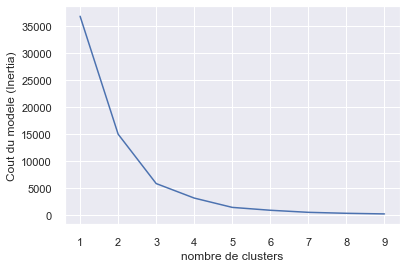

In [350]:
X = df_frequency[["order_purchase_timestamp"]]
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")


In [351]:
model = KMeans(n_clusters=5)
model.fit(X)
model.predict(X)
X["Groupe"] = model.labels_
X

,order_purchase_timestamp,Groupe
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
95415,2,1
95416,1,0
95417,1,0
95418,1,0


In [352]:
type_client = model.predict(X[["order_purchase_timestamp"]])
np.sort(type_client)
x = type_client
unique, counts = np.unique(x, return_counts=True)
x_count = np.asarray((unique, counts)).T
print(
    "Le cluster 0 contient {} clients, le cluster 1 contient {} clients et le cluster 2 contient {} clients et le cluster 3 contient {} clients et le cluster 4 contient {} clients".format(
    x_count[0][1], x_count[1][1], x_count[2][1], x_count[3][1], x_count[4][1]
    )
)


Le cluster 0 contient 83551 clients, le cluster 1 contient 8996 clients et le cluster 2 contient 514 clients et le cluster 3 contient 2304 clients et le cluster 4 contient 55 clients


In [353]:
min = X.groupby("Groupe").min()

max = X.groupby("Groupe").max()

frequency = min.assign(max = max)
frequency.rename(columns = {"order_purchase_timestamp":"min"}, inplace = True)
frequency


,min,max
Groupe,,
0,1,1
1,2,2
2,5,8
3,3,4
4,9,24


In [354]:
matrice = np.asarray((df_frequency))
print("Pour le cluster 0 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 1 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 2 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 3 les clients on commander pour la dernière fois entre {} et {} jours.\nPour le cluster 4 les clients on commander pour la dernière fois entre {} et {} jours. ".format(
    matrice[0][0], matrice[0][1], matrice[1][0], matrice[1][1], matrice[2][0], matrice[2][1], matrice[3][0], matrice[3][1], matrice[4][0], matrice[4][1])
     )

Pour le cluster 0 les clients on commander pour la dernière fois entre 0000366f3b9a7992bf8c76cfdf3221e2 et 1 jours.
Pour le cluster 1 les clients on commander pour la dernière fois entre 0000b849f77a49e4a4ce2b2a4ca5be3f et 1 jours.
Pour le cluster 2 les clients on commander pour la dernière fois entre 0000f46a3911fa3c0805444483337064 et 1 jours.
Pour le cluster 3 les clients on commander pour la dernière fois entre 0000f6ccb0745a6a4b88665a16c9f078 et 1 jours.
Pour le cluster 4 les clients on commander pour la dernière fois entre 0004aac84e0df4da2b147fca70cf8255 et 1 jours. 


<div style="display: flex; background-color: RGB(100,149,237);" >
<h2 style="margin: auto; padding: 30px; ">Panier Moyen K-means</h2>
</div>

Text(0, 0.5, 'Cout du modele (Inertia)')

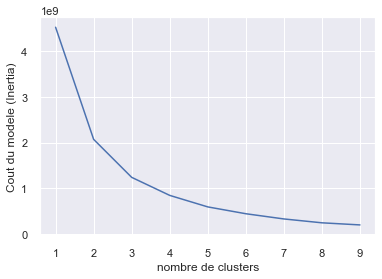

In [355]:
X = df_panier[["price"]]
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")

In [356]:
model = KMeans(n_clusters=5)
model.fit(X)
model.predict(X)
X["Groupe"] = model.labels_
X

,price,Groupe
0,129.90,1
1,18.90,1
2,69.00,1
3,25.99,1
4,180.00,0
...,...,...
95415,1570.00,2
95416,64.89,1
95417,89.90,1
95418,115.00,1


In [357]:
type_client = model.predict(X[["price"]])
np.sort(type_client)
x = type_client
unique, counts = np.unique(x, return_counts=True)
x_count = np.asarray((unique, counts)).T
print(
    "Le cluster 0 contient {} clients, le cluster 1 contient {} clients et le cluster 2 contient {} clients et le cluster 3 contient {} clients et le cluster 4 contient {} clients".format(
        x_count[0][1], x_count[1][1], x_count[2][1], x_count[3][1], x_count[4][1]
    )
)

Le cluster 0 contient 19245 clients, le cluster 1 contient 71707 clients et le cluster 2 contient 808 clients et le cluster 3 contient 3586 clients et le cluster 4 contient 74 clients


In [358]:
min = X.groupby("Groupe").min()

max = X.groupby("Groupe").max()

panier = min.assign(max = max)
panier.rename(columns = {"price":"min"}, inplace = True)
panier

,min,max
Groupe,,
0,156.20,448.47
1,0.85,156.00
2,1084.90,2550.00
3,448.70,1079.94
4,2589.00,13440.00


In [359]:
matrice = np.asarray((df_panier))
print("Pour le cluster 0 les clients on commander pour un montant entre {} et {} dollars.\nPour le cluster 1 les clients on commander pour un montant entre {} et {} dollars.\nPour le cluster 2 les clients on commander pour un montant entre {} et {} dollars \nPour le cluster 3 les clients on commander pour un montant entre {} et {} dollars \nPour le cluster 4 les clients on commander pour un montant entre {} et {} dollars. ".format(
    matrice[0][0], matrice[0][1], matrice[1][0], matrice[1][1], matrice[2][0], matrice[2][1], matrice[3][0], matrice[3][1], matrice[4][0], matrice[4][1])
     )

Pour le cluster 0 les clients on commander pour un montant entre 0000366f3b9a7992bf8c76cfdf3221e2 et 129.9 dollars.
Pour le cluster 1 les clients on commander pour un montant entre 0000b849f77a49e4a4ce2b2a4ca5be3f et 18.9 dollars.
Pour le cluster 2 les clients on commander pour un montant entre 0000f46a3911fa3c0805444483337064 et 69.0 dollars 
Pour le cluster 3 les clients on commander pour un montant entre 0000f6ccb0745a6a4b88665a16c9f078 et 25.99 dollars 
Pour le cluster 4 les clients on commander pour un montant entre 0004aac84e0df4da2b147fca70cf8255 et 180.0 dollars. 


<div style="display: flex; background-color: RGB(100,149,237);" >
<h2 style="margin: auto; padding: 30px; ">Application sur RFM</h2>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">Kmeans</h3>
</div>

In [360]:
df_rfm = pd.merge(df_max_purchase, df_frequency, on = "customer_unique_id", how = "inner")
df_rfm = pd.merge(df_rfm, df_panier, on = "customer_unique_id", how = "inner")
df_rfm = df_rfm.drop("MaxPurchaseDate", axis = 1)
df_rfm.rename(columns={"order_purchase_timestamp":"Frequence", "price":"Montant"}, inplace = True)
df_rfm.head()

,customer_unique_id,Recency,Frequence,Montant
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90
2,0000f46a3911fa3c0805444483337064,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00


Text(0, 0.5, 'Cout du modele (Inertia)')

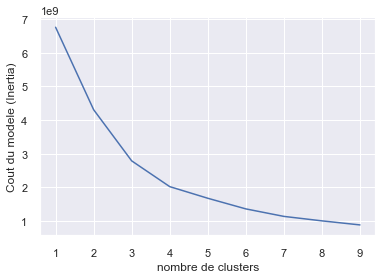

In [361]:
X = df_rfm[["Recency", "Frequence", "Montant"]]
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(X)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")

In [362]:
model = KMeans(n_clusters=5)
model.fit(X)
model.predict(X)
X["Groupe"] = model.labels_
X

,Recency,Frequence,Montant,Groupe
0,115,1,129.90,3
1,118,1,18.90,3
2,541,1,69.00,4
3,325,1,25.99,1
4,292,1,180.00,1
...,...,...,...,...
95415,451,2,1570.00,2
95416,266,1,64.89,1
95417,572,1,89.90,4
95418,123,1,115.00,3


In [363]:
count = X.groupby("Groupe").count()

min = X.groupby("Groupe").min()

max = X.groupby("Groupe").max()

mean = X.groupby("Groupe").mean()

In [364]:
X.Recency.mean(), X.Frequence.mean(), X.Montant.mean()

(242.60037727939635, 1.1805701110878222, 142.44019807180558)

In [365]:
count, min , max, mean.round(2)

(        Recency  Frequence  Montant
 Groupe                             
 0          5707       5707     5707
 1         33569      33569    33569
 2           756        756      756
 3         34170      34170    34170
 4         21218      21218    21218,
         Recency  Frequence  Montant
 Groupe                             
 0             4          1   332.80
 1           173          1     2.29
 2             8          1  1180.00
 3             0          1     0.85
 4           355          1     3.85,
         Recency  Frequence   Montant
 Groupe                              
 0           698         16   1175.80
 1           363         12    340.00
 2           697         24  13440.00
 3           181         12    379.99
 4           728         21    499.99,
         Recency  Frequence  Montant
 Groupe                             
 0        234.84       1.55   572.70
 1        258.91       1.15    97.45
 2        247.92       1.61  1784.55
 3         90.78       1.16 

Les caractère que l'on peut identifier sur nos différents groupe sont :

   - **Groupe 0** : Beaucoup de client, qui dépense moins que la moyenne (ceux qui dépense le moins), ont une fréquence    dans la moyenne, des clients dans la moyenne en terme de récence 
   - **Groupe 1** : Très peu de client, qui dépense énormement, sont ceux qui ont la fréquence la plus élevée, et une récence moyenne
   - **Groupe 2** : Beaucoup de clients, les plus récents, une fréquence dans la moyenne, un montant faible
   - **Groupe 3** : Beaucoup de clients, les moins récents, une fréquence moyenne, un montant faible
   - **Groupe 4** : Peu de clients, une récence moyenne, une fréquence forte, un montant élevé

**En résumé :**

| Groupe | Recence | Frequence | Count | Montant |
|--------|---------|-- --------|-------|---------|
| 0 | ~ | ~ | + | - |
| 1 | ~ | + | -- | ++ |
| 2 | + | ~ | + | - |
| 3 | - | ~ | + | - |
| 4 | ~ | + | - | + |

*~ = moyen*

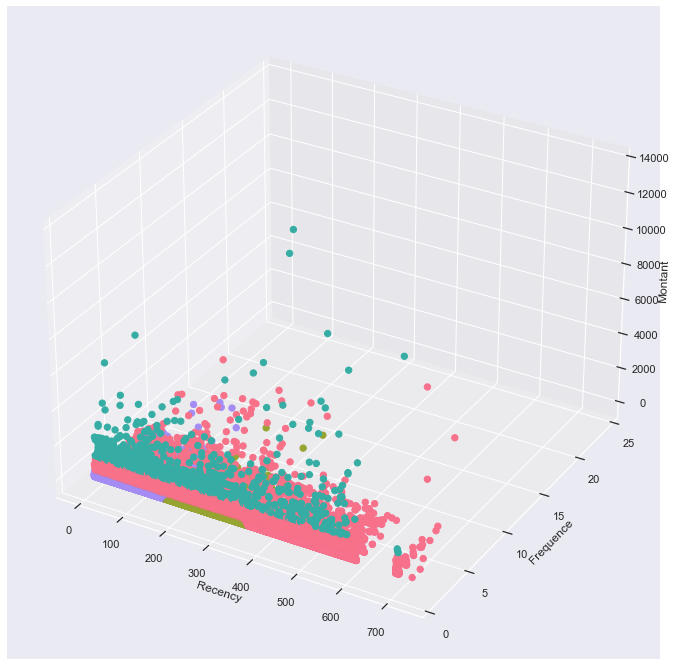

In [366]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(xs = X.Recency, ys = X.Frequence, zs = X.Montant, s=40, c=X.Groupe, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequence")
ax.set_zlabel("Montant")

plt.show()

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">CAH</h3>
</div>

In [367]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

In [368]:
cah_rfm = df_rfm[["Recency", "Frequence", "Montant"]].iloc[0:500]

fig = ff.create_dendrogram(cah_rfm)
fig.update_layout(width=800, height=500)
fig.show()

On peut voir grâce à ce dendrogramme que l'on peut choisir 4 ou 5 clusters

In [369]:
rfm = df_rfm[["Recency", "Frequence", "Montant"]].iloc[0:20000]
y_pred = AgglomerativeClustering(n_clusters=4).fit_predict(rfm)

In [370]:
rfm["groupe"] = y_pred

In [371]:
rfm

,Recency,Frequence,Montant,groupe
0,115,1,129.90,2
1,118,1,18.90,2
2,541,1,69.00,3
3,325,1,25.99,2
4,292,1,180.00,2
...,...,...,...,...
19995,264,1,169.99,2
19996,182,1,27.90,2
19997,219,3,82.88,2
19998,299,1,149.90,2


In [372]:
count = rfm.groupby("groupe").count()

min = rfm.groupby("groupe").min()

max = rfm.groupby("groupe").max()

mean = rfm.groupby("groupe").mean()

In [373]:
count, mean, min, max, rfm.mean()

(        Recency  Frequence  Montant
 groupe                             
 0           173        173      173
 1          1493       1493     1493
 2         14197      14197    14197
 3          4137       4137     4137,
            Recency  Frequence      Montant
 groupe                                    
 0       251.497110   1.601156  1747.934740
 1       242.832552   1.507703   498.420308
 2       177.428541   1.144185    93.002738
 3       468.842156   1.158811   116.989531,
         Recency  Frequence  Montant
 groupe                             
 0            16          1  1050.61
 1             8          1   223.99
 2             4          1     2.20
 3           303          1     5.90,
         Recency  Frequence   Montant
 groupe                              
 0           584         18  13440.00
 1           697         15   1099.00
 2           413         12    379.99
 3           700          6    550.99,
 Recency      243.230550
 Frequence      1.178300
 Montant  

**En résumé :**

| Groupe | Recence | Frequence | Count | Montant |
|--------|---------|-- --------|-------|---------|
| 0 | -- | ~ | + | ++ |
| 1 | - | ~ | + | + |
| 2 | ++ | + | ~ | - |
| 3 | ~ | - | ~ | ~ |

*~ = moyen*

Nous tombons sur des résultats similaires à celles des k-means mais qui demande plus de puissance et qui de ce fait nous obtenons des résultats bien moins précis

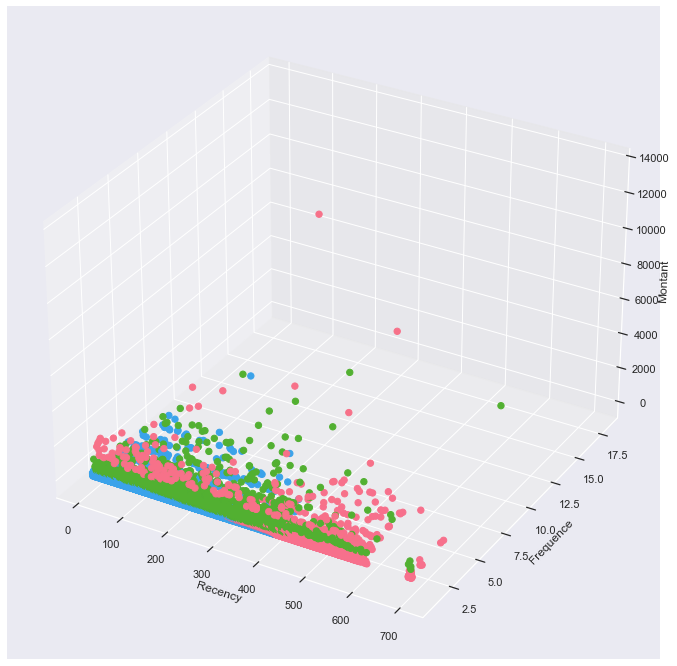

In [374]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(xs = rfm.Recency, ys = rfm.Frequence, zs = rfm.Montant, s=40, c=rfm.groupe, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequence")
ax.set_zlabel("Montant")

plt.show()

<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">DBSCAN</h3>
</div>

[[0.         0.        ]
 [0.         0.91      ]
 [0.         1.        ]
 ...
 [0.         3.01337021]
 [0.         0.9       ]
 [0.         0.9       ]]
20000


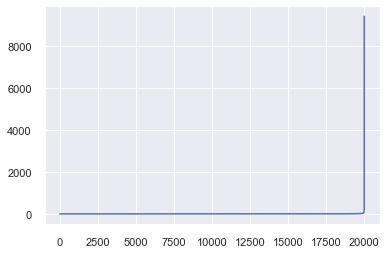

In [375]:
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(rfm)
distances, indices = nbrs.kneighbors(rfm)
print(distances)
distances = np.sort(distances, axis=0)
print(len(distances))
distances = distances[0:50000,1]
plt.plot(distances);

In [376]:
distances

array([   0.        ,    0.        ,    0.        , ...,  303.34478337,
        438.11868266, 9440.30415826])

In [377]:
from sklearn.cluster import DBSCAN

y_pred = DBSCAN(eps = 0.025, min_samples=5).fit_predict(X)
plt.scatter(X['abscisse'],X['ordonnée'],c = y_pred);

KeyError: 'abscisse'

In [378]:
rfm = df_rfm[["Recency", "Frequence", "Montant"]]
y_pred = DBSCAN(eps = 2, min_samples=5).fit_predict(rfm)

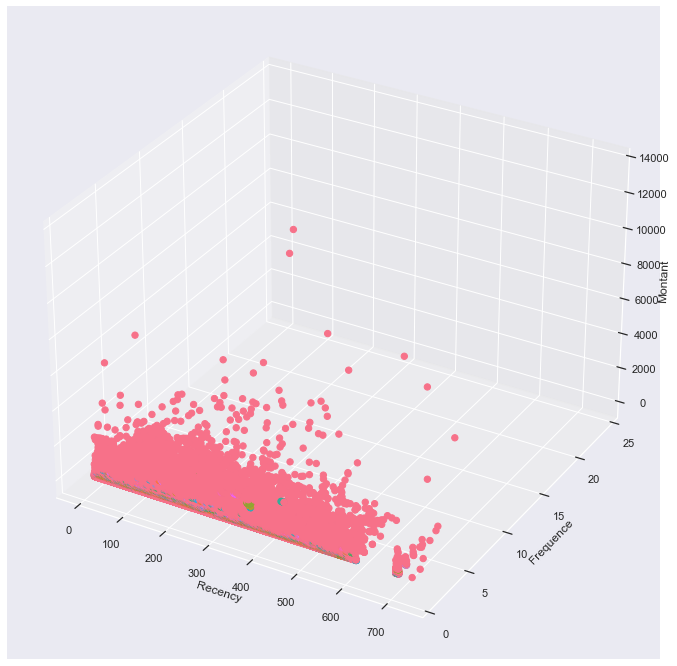

In [379]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection = '3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(xs = rfm.Recency, ys = rfm.Frequence, zs = rfm.Montant, s=40, c=y_pred, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel("Recency")
ax.set_ylabel("Frequence")
ax.set_zlabel("Montant")

plt.show()

In [380]:
rfm["groupe"] = y_pred 

In [381]:
rfm

,Recency,Frequence,Montant,groupe
0,115,1,129.90,0
1,118,1,18.90,0
2,541,1,69.00,1
3,325,1,25.99,0
4,292,1,180.00,2
...,...,...,...,...
95415,451,2,1570.00,-1
95416,266,1,64.89,0
95417,572,1,89.90,55
95418,123,1,115.00,0


In [382]:
rfm.groupby(["groupe"]).count()

,Recency,Frequence,Montant
groupe,,,
-1,16459,16459,16459
0,60561,60561,60561
1,217,217,217
2,177,177,177
3,5,5,5
...,...,...,...
960,5,5,5
961,5,5,5
962,5,5,5


<div style="display: flex; background-color: RGB(100,149,237);" >
<h3 style="margin: auto; padding: 30px; ">PCA</h3>
</div>

In [397]:
rfm_pca = df_rfm.drop(["customer_unique_id"], axis = 1)

### 1-Centrer-réduir

In [398]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(rfm_pca)

rfm_pca = scaler.transform(rfm_pca) 

rfm_pca

array([[-0.83312079, -0.2905643 , -0.05761497],
       [-0.81353336, -0.2905643 , -0.56759586],
       [ 1.94829305, -0.2905643 , -0.33741529],
       ...,
       [ 2.1506964 , -0.2905643 , -0.24139187],
       [-0.78088766, -0.2905643 , -0.12607186],
       [ 1.60224861, -0.2905643 , -0.39259431]])

### 2-Réaliser la PCA

In [399]:
from sklearn.decomposition import PCA

mypca = PCA(n_components=3) 

mypca.fit(rfm_pca)

print(mypca.singular_values_) 

print(mypca.explained_variance_ratio_) 

print(mypca.components_)  

data_sortie= mypca.fit_transform(rfm_pca)

print(mypca.noise_variance_)

[336.86088077 308.91691961 278.12781916]
[0.39640625 0.33336709 0.27022666]
[[-0.03890511  0.70719428  0.70594804]
 [ 0.9982187  -0.00447279  0.05949296]
 [-0.04523064 -0.70700512  0.70576055]]
0.0


### 3-Verification

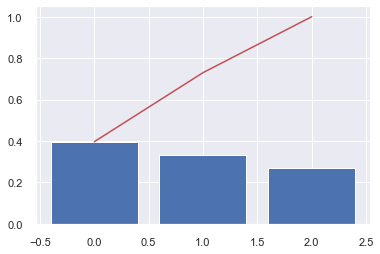

In [400]:
import numpy as np

y = list(mypca.explained_variance_ratio_)

x = range(len(y))

ycum = np.cumsum(y)

plt.bar(x,y)

plt.plot(x,ycum,"-r")

plt.show()

<div style="display: flex; background-color: RGB(100,149,237);" >
<h5 style="margin: auto; padding: 30px; ">PCA K-means CAH et DBscan</h5>
</div>

### K-means :

Text(0, 0.5, 'Cout du modele (Inertia)')

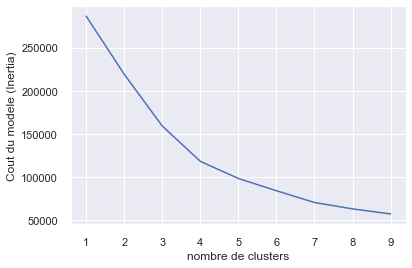

In [403]:
k_mean = rfm_pca
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, max_iter=1000).fit(k_mean)
    inertia.append(model.inertia_)
plt.plot(K_range, inertia)
plt.xlabel("nombre de clusters")
plt.ylabel("Cout du modele (Inertia)")

In [410]:
model = KMeans(n_clusters=5)
model.fit(k_mean)

KMeans(n_clusters=5)

In [422]:
test = pd.concat([df_rfm,pd.DataFrame(k_mean)], axis = 1)
test.columns.values[-3: ] = ['Component 1', "Component 2", "Component 3"]
test["groupe"] = model.labels_

In [423]:
test

,customer_unique_id,Recency,Frequence,Montant,Component 1,Component 2,Component 3,groupe
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,-0.833121,-0.290564,-0.057615,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,-0.813533,-0.290564,-0.567596,2
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1.948293,-0.290564,-0.337415,0
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,0.537999,-0.290564,-0.535021,0
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,0.322537,-0.290564,0.172566,0
...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,451,2,1570.00,1.360670,1.318585,6.558813,3
95416,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,0.152779,-0.290564,-0.356298,2
95417,ffff371b4d645b6ecea244b27531430a,572,1,89.90,2.150696,-0.290564,-0.241392,0
95418,ffff5962728ec6157033ef9805bacc48,123,1,115.00,-0.780888,-0.290564,-0.126072,2


C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

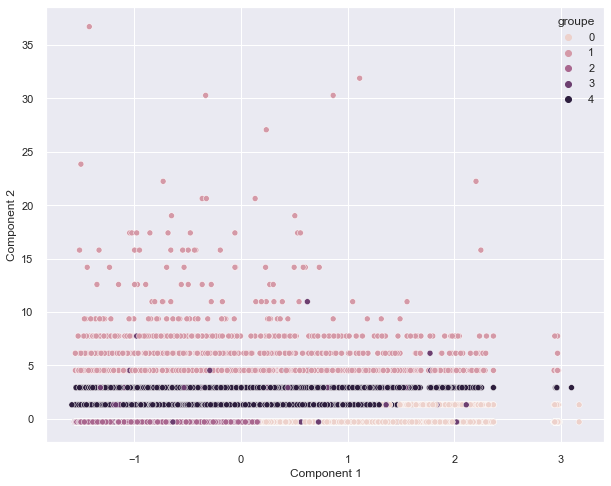

In [424]:
plt.figure(figsize=(10,8))
sns.scatterplot(test['Component 1'], test['Component 2'], hue = test.groupe)

In [428]:
rfm = df_rfm[["Recency", "Frequence", "Montant"]]

### T-SNE

In [429]:
from sklearn.manifold import TSNE
rfm_tsne = TSNE(n_components=3).fit_transform(rfm)
dftsne = pd.DataFrame(rfm_tsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



NameError: name 'skillsPCA_labels' is not defined

,0,1,2
0,23.028891,4.307317,5.507910
1,-26.384327,-4.635940,7.770419
2,1.072488,6.609197,-0.739441
3,-3.043211,3.864445,-19.973989
4,9.148437,-3.033621,-8.040479
...,...,...,...
95415,-3.348314,17.381187,19.427830
95416,13.722942,-2.919824,-22.148720
95417,10.723061,4.933229,-4.308694
95418,23.505074,7.578723,-0.365441
